🎬 Movie Recommendation System
📊 Users Dataset:
   user_id     name           favorite_genres
0        1    Alice   action adventure sci-fi
1        2      Bob      comedy romance drama
2        3  Charlie   horror thriller mystery
3        4    Diana     action thriller crime
4        5      Eve     romance drama musical
5        6    Frank  sci-fi fantasy adventure
6        7    Grace   comedy family animation
7        8    Henry   drama biography history
8        9      Ivy    thriller mystery crime
9       10     Jack  adventure fantasy sci-fi

🎭 Movies Dataset:
    movie_id               title                   genres
0          1   Avengers: Endgame  action adventure sci-fi
1          2        The Notebook            romance drama
2          3             Get Out  horror thriller mystery
3          4           John Wick    action thriller crime
4          5          La La Land    romance drama musical
5          6        Interstellar   sci-fi drama adventure
6          7         T

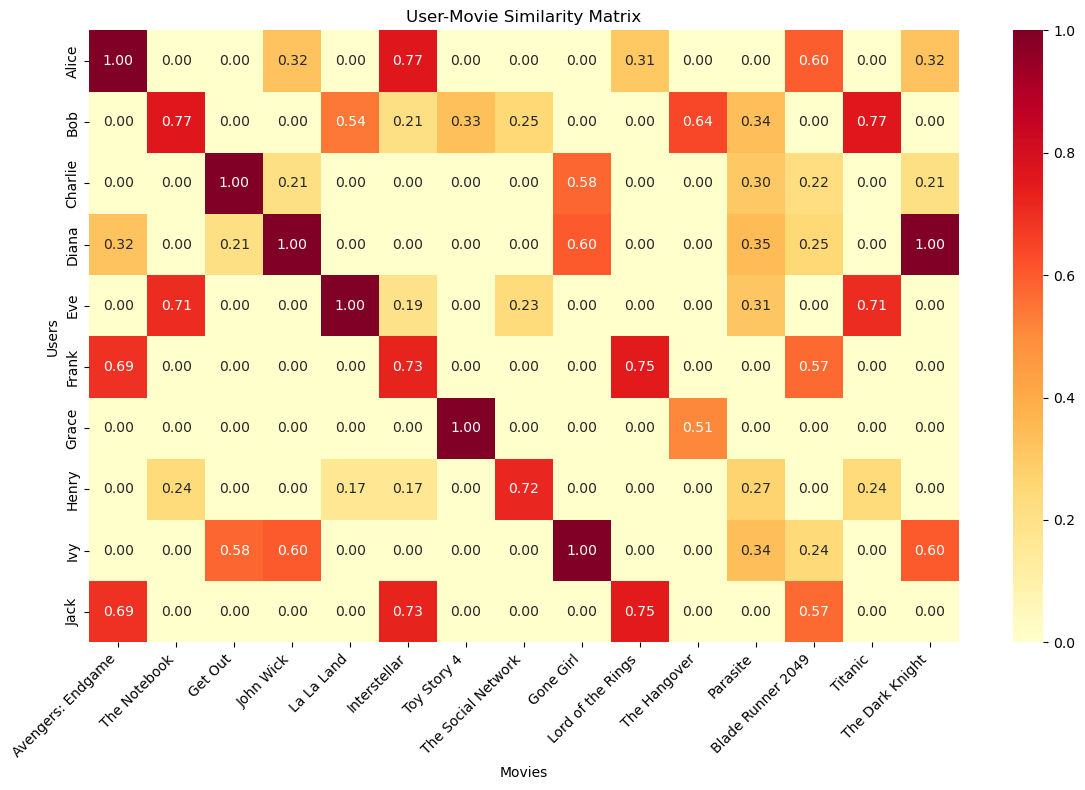


📊 System Performance Analysis
📈 System Stats:
Total Users: 10
Total Movies: 15
Feature Vector Size: 17
Average Similarity Score: 0.690
Similarity Score Range: 0.409 - 0.867

✅ Recommendation System Complete!
🚀 Ready to deploy and get movie recommendations!


In [1]:
# Movie Recommendation System - Content-Based Filtering

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

print(" Movie Recommendation System")
print("=" * 50)

# Step 1: Create Dataset
# 10 users with their favorite movie genres/preferences
users_data = {
    'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack'],
    'favorite_genres': [
        'action adventure sci-fi',
        'comedy romance drama',
        'horror thriller mystery',
        'action thriller crime',
        'romance drama musical',
        'sci-fi fantasy adventure',
        'comedy family animation',
        'drama biography history',
        'thriller mystery crime',
        'adventure fantasy sci-fi'
    ]
}

# Movies dataset with genres
movies_data = {
    'movie_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'title': [
        'Avengers: Endgame', 'The Notebook', 'Get Out', 'John Wick',
        'La La Land', 'Interstellar', 'Toy Story 4', 'The Social Network',
        'Gone Girl', 'Lord of the Rings', 'The Hangover', 'Parasite',
        'Blade Runner 2049', 'Titanic', 'The Dark Knight'
    ],
    'genres': [
        'action adventure sci-fi',
        'romance drama',
        'horror thriller mystery',
        'action thriller crime',
        'romance drama musical',
        'sci-fi drama adventure',
        'comedy family animation',
        'drama biography',
        'thriller mystery crime',
        'adventure fantasy',
        'comedy',
        'thriller drama',
        'sci-fi thriller',
        'romance drama',
        'action crime thriller'
    ]
}

users_df = pd.DataFrame(users_data)
movies_df = pd.DataFrame(movies_data)

print("📊 Users Dataset:")
print(users_df)
print("\n🎭 Movies Dataset:")
print(movies_df)

# Step 2: Recommendation Logic using TF-IDF + Cosine Similarity

class MovieRecommendationSystem:
    def __init__(self, users_df, movies_df):
        self.users_df = users_df
        self.movies_df = movies_df
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        self.setup_vectors()
    
    def setup_vectors(self):
        """Convert text data to TF-IDF vectors"""
        # Combine all text data for vectorization
        all_text = list(self.users_df['favorite_genres']) + list(self.movies_df['genres'])
        
        # Fit TF-IDF vectorizer
        self.tfidf_vectorizer.fit(all_text)
        
        # Transform user preferences and movie genres
        self.user_vectors = self.tfidf_vectorizer.transform(self.users_df['favorite_genres'])
        self.movie_vectors = self.tfidf_vectorizer.transform(self.movies_df['genres'])
    
    def get_recommendations(self, user_id, top_n=3):
        """Get top N movie recommendations for a user"""
        # Get user vector
        user_idx = user_id - 1  # Convert to 0-based index
        user_vector = self.user_vectors[user_idx]
        
        # Calculate cosine similarity between user and all movies
        similarities = cosine_similarity(user_vector, self.movie_vectors).flatten()
        
        # Get top N recommendations
        top_indices = similarities.argsort()[-top_n:][::-1]
        
        recommendations = []
        for idx in top_indices:
            recommendations.append({
                'movie_id': self.movies_df.iloc[idx]['movie_id'],
                'title': self.movies_df.iloc[idx]['title'],
                'genres': self.movies_df.iloc[idx]['genres'],
                'similarity_score': similarities[idx]
            })
        
        return recommendations
    
    def explain_recommendation(self, user_id, recommendations):
        """Explain why movies were recommended"""
        user_name = self.users_df[self.users_df['user_id'] == user_id]['name'].iloc[0]
        user_interests = self.users_df[self.users_df['user_id'] == user_id]['favorite_genres'].iloc[0]
        
        print(f"\n🎯 Recommendations for {user_name}:")
        print(f"User interests: {user_interests}")
        print("-" * 40)
        
        for i, rec in enumerate(recommendations, 1):
            print(f"{i}. {rec['title']}")
            print(f"   Genres: {rec['genres']}")
            print(f"   Similarity Score: {rec['similarity_score']:.3f}")
            print(f"   Why recommended: Common genres with user preferences")
            print()

# Step 3: Initialize and Test the System
print("\n🔧 Setting up Recommendation System...")
rec_system = MovieRecommendationSystem(users_df, movies_df)

# Test with different users
test_users = [1, 3, 5, 7]

for user_id in test_users:
    recommendations = rec_system.get_recommendations(user_id, top_n=3)
    rec_system.explain_recommendation(user_id, recommendations)

print("\n Alternative: Manual Matching Approach")
print("=" * 50)

def simple_recommendation(user_id, top_n=3):
    """Simple keyword matching approach"""
    user_genres = users_df[users_df['user_id'] == user_id]['favorite_genres'].iloc[0].split()
    user_name = users_df[users_df['user_id'] == user_id]['name'].iloc[0]
    
    movie_scores = []
    for _, movie in movies_df.iterrows():
        movie_genres = movie['genres'].split()
        # Count common genres
        common_genres = len(set(user_genres) & set(movie_genres))
        movie_scores.append((movie['title'], movie['genres'], common_genres))
    
    # Sort by score and get top N
    movie_scores.sort(key=lambda x: x[2], reverse=True)
    
    print(f"\n📱 Simple Recommendations for {user_name}:")
    print(f"User likes: {' '.join(user_genres)}")
    print("-" * 40)
    
    for i, (title, genres, score) in enumerate(movie_scores[:top_n], 1):
        print(f"{i}. {title}")
        print(f"   Genres: {genres}")
        print(f"   Common genres: {score}")
        print()

simple_recommendation(1)
simple_recommendation(3)

print("\n Creating Visualization...")

# Create similarity matrix
similarity_matrix = cosine_similarity(rec_system.user_vectors, rec_system.movie_vectors)

plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, 
            xticklabels=movies_df['title'], 
            yticklabels=users_df['name'],
            annot=True, 
            cmap='YlOrRd', 
            fmt='.2f')
plt.title('User-Movie Similarity Matrix')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 6: Performance Analysis
print("\n System Performance Analysis")
print("=" * 50)

def analyze_system_performance():
    """Analyze recommendation system performance"""
    total_users = len(users_df)
    total_movies = len(movies_df)
    
    print(f" System Stats:")
    print(f"Total Users: {total_users}")
    print(f"Total Movies: {total_movies}")
    print(f"Feature Vector Size: {rec_system.tfidf_vectorizer.get_feature_names_out().shape[0]}")
    
    # Calculate average similarity scores
    avg_similarities = []
    for user_id in range(1, total_users + 1):
        recs = rec_system.get_recommendations(user_id, top_n=3)
        avg_sim = np.mean([rec['similarity_score'] for rec in recs])
        avg_similarities.append(avg_sim)
    
    print(f"Average Similarity Score: {np.mean(avg_similarities):.3f}")
    print(f"Similarity Score Range: {np.min(avg_similarities):.3f} - {np.max(avg_similarities):.3f}")

analyze_system_performance()

print("\n Recommendation System Complete!")
print(" Ready to deploy and get movie recommendations!")